# <span style="color:red">  Lecture 3</span>
---

### Abstract
In option pricing theory, Black-Scholes theory assumes that the market is maximally efficient, i.e. it has infinite liquidity and that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.
Making those assumption, BS theory provides an analytic solution for the price at any time $t<T$, for European Call-option price $C[S(t), t]$ and Put-option price $P[S(t), t]$, where $S(t)$ represents the asset price at the time t.

We want to evaluate the option prices at $t=0$ in two different ways:
1. by sampling directly the final asset price $S(T)$ for a $GBM(r,\sigma^2)$;
2. by sampling the discretized $GBM(r,\sigma^2)$ path of the asset price, dividing $[0,T]$ in $nsteps=10^3$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{1000}=T=1)$

In this lecture, both these methods have been implemented in order to compare the final results, for both the Call-option and Put-option prices, with the exact solution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from scipy.special import erf
from numpy import exp
from numpy.lib.scimath import log, sqrt

S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

### Exercise 03.1

In [3]:
prices = {
    "C": [pd.read_csv("../data/mean_C_1.dat", sep="\t"), pd.read_csv("../data/mean_C_1000.dat", sep="\t")], 
    "P": [pd.read_csv("../data/mean_P_1.dat", sep="\t"), pd.read_csv("../data/mean_P_1000.dat", sep="\t")]
}

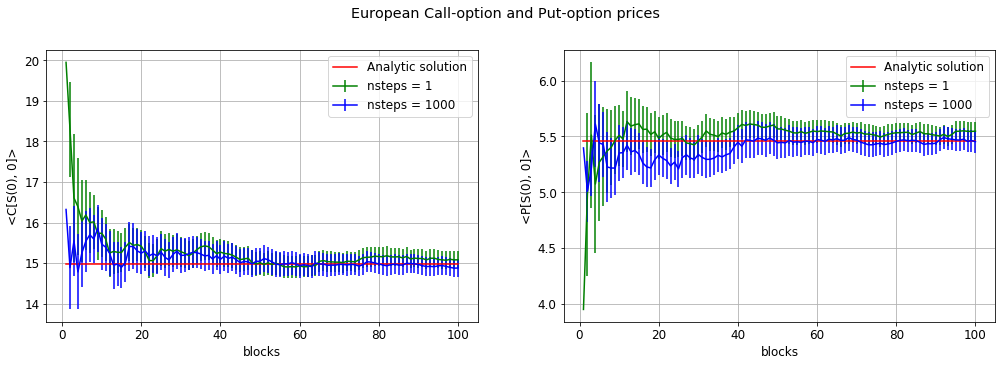

On the last block
- C[S(0), 0]:
  (nsteps = 1)    estimate:  15.082  ±  0.212 ,	expected value:  14.976
  (nsteps = 1000) estimate:  14.879  ±  0.217 ,	expected value:  14.976
- P[S(0), 0]:
  (nsteps = 1)    estimate:  5.547  ±  0.086 ,	expected value:  5.460
  (nsteps = 1000) estimate:  5.453  ±  0.097 ,	expected value:  5.460


In [4]:
call_price, put_price = black_scholes(S0, K, T, r, sigma)

plt.rcParams.update({'font.size':12})
fig, (ax1, ax2) = plt.subplots(figsize=(17, 5), ncols=2)
fig.suptitle("European Call-option and Put-option prices", y=1.)

# Call-option prices
c_prices = prices["C"]
ax = ax1
ax.errorbar(np.arange(len(c_prices[0]))+1, c_prices[0].iloc[:, 0], yerr=c_prices[0].iloc[:, 1], color="green", label="nsteps = 1")
ax.errorbar(np.arange(len(c_prices[1]))+1, c_prices[1].iloc[:, 0], yerr=c_prices[1].iloc[:, 1], color="blue", label="nsteps = 1000")
ax.plot([1, len(c_prices[0])], [call_price, call_price], color="red", label="Analytic solution")
ax.set_xlabel("blocks")
ax.set_ylabel("<C[S(0), 0]>")
ax.grid(True)
ax.legend()

# Put-option prices
p_prices = prices["P"]
ax = ax2
ax.errorbar(np.arange(len(p_prices[0]))+1, p_prices[0].iloc[:, 0], yerr=p_prices[0].iloc[:, 1], color="green", label="nsteps = 1")
ax.errorbar(np.arange(len(p_prices[1]))+1, p_prices[1].iloc[:, 0], yerr=p_prices[1].iloc[:, 1], color="blue", label="nsteps = 1000")
ax.plot([1, len(p_prices[0])], [put_price, put_price], color="red", label="Analytic solution")
ax.set_xlabel("blocks")
ax.set_ylabel("<P[S(0), 0]>")
ax.grid(True)
ax.legend()

plt.show()


print("On the last block")
print("- C[S(0), 0]:")
print("  (nsteps = 1)    estimate: ", format(c_prices[0].iloc[-1, 0], '.3f'), " ± ", format(c_prices[0].iloc[-1, 1], '.3f'), ",\texpected value: ", format(call_price, '.3f'))
print("  (nsteps = 1000) estimate: ", format(c_prices[1].iloc[-1, 0], '.3f'), " ± ", format(c_prices[1].iloc[-1, 1], '.3f'), ",\texpected value: ", format(call_price, '.3f'))
print("- P[S(0), 0]:")
print("  (nsteps = 1)    estimate: ", format(p_prices[0].iloc[-1, 0], '.3f'), " ± ", format(p_prices[0].iloc[-1, 1], '.3f'), ",\texpected value: ", format(put_price, '.3f'))
print("  (nsteps = 1000) estimate: ", format(p_prices[1].iloc[-1, 0], '.3f'), " ± ", format(p_prices[1].iloc[-1, 1], '.3f'), ",\texpected value: ", format(put_price, '.3f'))

We can observe that the estimates are compatible with the analytic solutions within the statistical error. Both methods provide the result with approximately the same error, so the direct one should be preferred, as it is less computational expensive than the discrete one.